In [ ]:
# Abdülhalim YAYDEMİR

# 1

Dosya bilgisi :

P5 pgm formatı
width= 1114
height= 834
maxval= 255


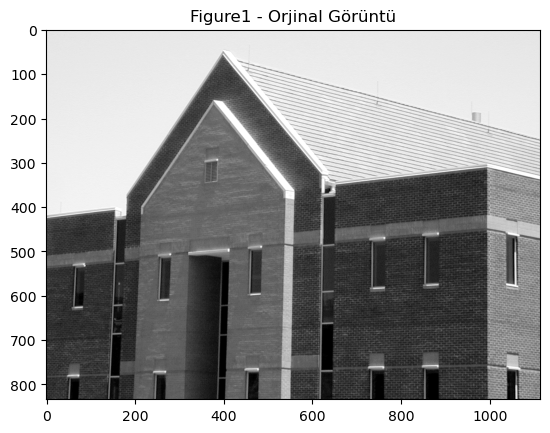

In [7]:
import matplotlib.pyplot as plt # görüntüyü bastırmak için gereklidir
import numpy as np # array işlemleri için gerekli
import math # matematiksel işlemler için gerekli
from scipy import fftpack # fft işlemleri için gerekli
from scipy import signal # konvolusyon işlemi için gerekli

###########################fonksiyonlar###########################

# dosya okuma işlemini yapan fonksiyon
def mypgmread(pgm):
    #Fig0338(a)(blurry_moon).pgm dosyası 'rb' modunda açılarak okundu.
    with open(pgm, "rb") as fileObject:
        fileContent=fileObject.read()
        
        #dosyanın ilk iki karakterine bakılarak P5 formatı olup olmadığına bakıldı
        print('Dosya bilgisi :\n')
        i=0
        while fileContent[i]!=10:
            if i==0:
                if (fileContent[0]==80) & (fileContent[1]==53):
                    print('P5 pgm formatı')  
                else:
                    print('P5 pgm formatı değil')
            i=i+1

    
        # '#' ile başlayan satır geçildi.
        i=i+1
        while fileContent[i]!=10:
            if fileContent[i]==35:
                while fileContent[i]!=10:
                    i=i+1
    
        # genişlik yükseklik bilgileri yazdırıldı
        i=i+1
        while fileContent[i]!=10:
            if fileContent[i]==35:
                while fileContent[i]!=10:
                    i=i+1  
            else:
                string=[]
            
                while fileContent[i]!=32:
                    width=chr(fileContent[i])
                    string.append(width)       
                    i=i+1
                
                string=''.join(string)
                width=int(string)
                print("width=",width)
                i=i+1
                string=[]
            
                while fileContent[i]!=10:
                    height=chr(fileContent[i])
                    string.append(height)
                    i=i+1
                    
                string=''.join(string)
                height=int(string)
                print("height=",height)
                     
            
        # maxval değeri yazdırıldı
        i=i+1
        string=[]
        while fileContent[i]!=10:
            maxval=chr(fileContent[i])
            string.append(maxval)       
            i=i+1
    
        string=''.join(string)
        maxval=int(string)
        print("maxval=",maxval)
    

        i=i+1
        f=np.arange(height*width).reshape((height,width))      
        for m in range(height):
            for n in range(width):
                f[m][n]=fileContent[i]
                i=i+1
                
        return f,height,width
    




# x yönünde sobel maskesi işlemi
def sobelx(height,width,f):
    gx=np.arange((height*width)).reshape((height,width))

    for m in range(height):
        for n in range(width):
            gx[m][n]=0
            for r in range(-1,2):
                for s in range(-1,2):
                    if ((m+r)>(height-1)) | ((n+s)>(width-1)) | ((m+r)<0) | ((n+s)<0):
                        gx[m][n]+=0
                    else:
                        if ((r==-1)&(s==-1))|((r==-1)&(s==1)):
                            gx[m][n]+=-1*f[m+r][n+s]
                            
                        if ((r==1)&(s==-1))|((r==1)&(s==1)):
                            gx[m][n]+=1*f[m+r][n+s]
                            
                        if ((r==1)&(s==0)):
                            gx[m][n]+=2*f[m+r][n+s]
                            
                        if ((r==-1)&(s==0)):   
                            gx[m][n]+=-2*f[m+r][n+s]
                        
                        if ((r==0)&(s==-1))|((r==0)&(s==0))|((r==0)&(s==1)):
                            gx[m][n]+=0*f[m+r][n+s]
                            
                            
                                     
            gx[m][n]=np.abs(gx[m][n])
    
    return gx


# y yönünde sobel maskesi işlemi
def sobely(height,width,f):
    gy=np.arange((height*width)).reshape((height,width))

    for m in range(height):
        for n in range(width):
            gy[m][n]=0
            for r in range(-1,2):
                for s in range(-1,2):
                    if ((m+r)>(height-1)) | ((n+s)>(width-1)) | ((m+r)<0) | ((n+s)<0):
                        gy[m][n]+=0
                    else:
                        
                        if ((r==-1)&(s==-1))|((r==1)&(s==-1)):
                            gy[m][n]+=-1*f[m+r][n+s]
                            
                        if ((r==-1)&(s==1))|((r==1)&(s==1)):
                            gy[m][n]+=1*f[m+r][n+s]
                            
                        if ((r==0)&(s==-1)):
                            gy[m][n]+=-2*f[m+r][n+s]
                            
                        if ((r==0)&(s==1)):   
                            gy[m][n]+=2*f[m+r][n+s]
                        
                        if ((r==0)&(s==0))|((r==-1)&(s==0))|((r==1)&(s==0)):
                            gy[m][n]+=0*f[m+r][n+s]  
                            
                            
                                     
            gy[m][n]=np.abs(gy[m][n])
    
    return gy

# istenilen boyutta ortalama alma işlemi
def average(d,height,width,f):
    g=np.arange((height*width)).reshape((height,width))
    
    for m in range(height):
        for n in range(width):
            g[m][n]=0
            for r in range(math.floor(-(d-1)/2),math.floor(((d-1)/2)+1)):
                for s in range(math.floor(-(d-1)/2),math.floor(((d-1)/2)+1)):
                    if ((m+r)>(height-1)) | ((n+s)>(width-1)) | ((m+r)<0) | ((n+s)<0):
                        g[m][n]=g[m][n]+0
                    else:
                        g[m][n]=g[m][n]+f[m+r][n+s]
                            
            g[m][n]=math.floor(g[m][n]/(d*d))
 
    return g

####################################################################



# okunacak dosya  Fig1016(a)(building_original).pgm
pgm="Fig1016(a)(building_original).pgm"


# dosya içeriği, height ve width bilgileri alındı. 
f,height,width=mypgmread(pgm)  


#orjinal görüntü ekrana yazdırıldı
plt.figure()
plt.title("Figure1 - Orjinal Görüntü")
plt.imshow(f,cmap='gray') 

# YORUM

In [8]:
# Orjinal görüntü ekrana yazdırıldı.

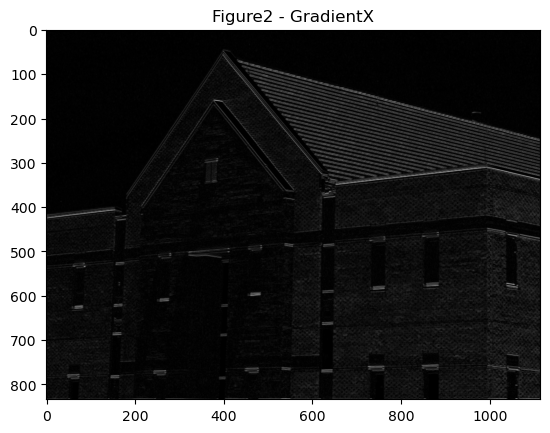

In [9]:
# x yönünde sobel maskesi işlemi
gxx=sobelx(height,width,f)
# X yönünde sobel işlemi sonucu (zamanda)
plt.figure()
plt.title("Figure2 - GradientX")
plt.imshow(gxx,cmap='gray') 


# YORUM

In [10]:
# Orjinal görüntünün x yönündeki gradienti elde edildi ve ekrana bastırıldı.
# X yönündeki (yukarı aşağı eksendeki) sobel işlemi, görüntünün x eksenindeki değişimlerini belirginleştirmektedir.
# Sonucu analiz ettiğimizde de x yönündeki değişimler ortaya çıkmıştır. (örneğin çatı çizgileri , pencere ve kapıların alt 
# ve üst tarafları)  

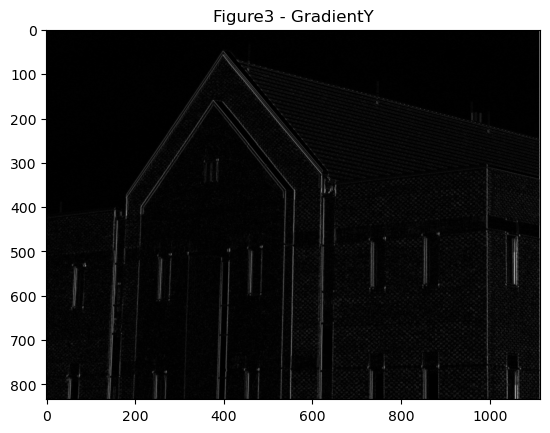

In [11]:
# y yönünde sobel maskesi işlemi
gyy=sobely(height,width,f)
# Y yönünde sobel işlemi sonucu (zamanda)
plt.figure()
plt.title("Figure3 - GradientY")
plt.imshow(gyy,cmap='gray') 


# YORUM

In [12]:
# Orjinal görüntünün y yönündeki gradienti elde edildi ve ekrana bastırıldı.
# Y yönündeki (sağ sol eksendeki) sobel işlemi, görüntünün y eksenindeki değişimlerini belirginleştirmektedir.
# Sonucu analiz ettiğimizde de y yönündeki değişimler ortaya çıkmıştır. (örneğin pencere ve kapıların sağ 
# ve sol tarafları) 

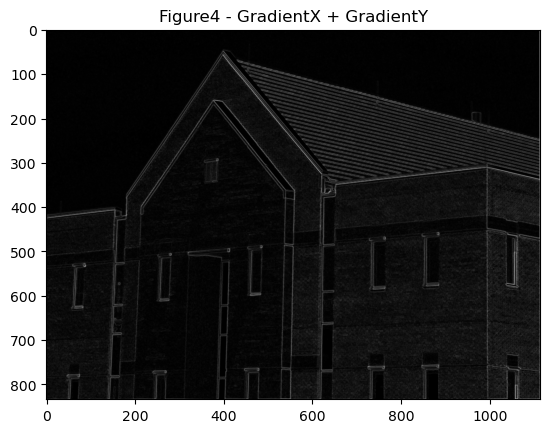

In [13]:
# x ve y yönünde sobel işlemleri toplandı
G=gxx+gyy

# X ve Y yönündeki toplam gradient çizdirildi
plt.figure()
plt.title("Figure4 - GradientX + GradientY")
plt.imshow(G,cmap='gray') 

# YORUM

In [14]:
# Orjinal görüntünün x ve y yönündeki gradientleri toplandı ve ekrana bastırıldı.
# X yönündeki (yukarı aşağı eksendeki) ve Y yönündeki (sağ sol eksendeki) değişimler belirginleşmektedir.
# Sonucu analiz ettiğimizde de x ve y yönündeki değişimler ortaya çıkmıştır.

# 5x5 average uygulanmış hali için işlemler tekrar  edilirse:

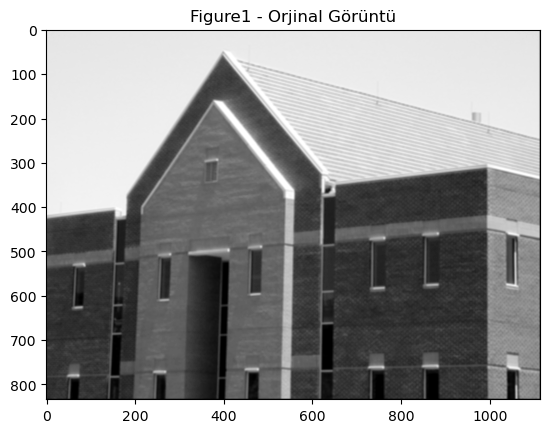

In [17]:
# orjinal görüntüye 5x5 ortalama maskesi uygulandı.
f_average_5x5=average(5,height,width,f)

# 5x5 ortalaması alınmış görüntü ekrana yazdırıldı
plt.figure()
plt.title("Figure1 - Orjinal Görüntü")
plt.imshow(f_average_5x5,cmap='gray') 

# YORUM

In [ ]:
# Orjinal görüntüye 5x5'lik ortalama maskesi uygulanarak yumuşatma işlemi yapıldı.
# Görüntü yumuşatma işlemi küçük detaylarda (örneğin duvar yüzeylerindeki) değişimleri azaltarak, nispeten küçük değişimleri
# daha homojen hale getirdi.

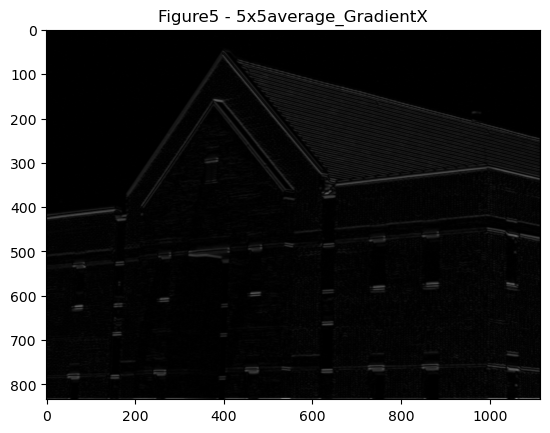

In [18]:
# x yönündeki sobel maskesi işlemi
gxx_average_5x5=sobelx(height,width,f_average_5x5)

# X yönündeki sobel işlemi sonucu (zamanda)
plt.figure()
plt.title("Figure5 - 5x5average_GradientX")
plt.imshow(gxx_average_5x5,cmap='gray') 

# YORUM 

In [ ]:
# Yumuşatılmış orjinal görüntünün x (aşağı yukarı) yönündeki gradienti ekrana bastırıldı.
# Yumuşatma işlemi küçük değişimleri belirsiz, daha homojen hale getirdiğinden dolayı bir önceki kısımdaki aynı işleme göre 
# daha az değişim bölgesi ortaya çıkartıldı.
# Genellikle dış cephe gibi daha kalın değişimlerin olduğu yerler ortaya çıkmış oldu.

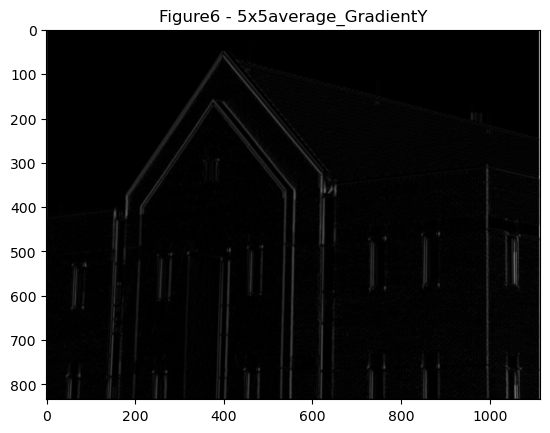

In [19]:
# y yönündeki sobel maskesi işlemi
gyy_average_5x5=sobely(height,width,f_average_5x5)

# Y yönündeki sobel işlemi sonucu (zamanda)
plt.figure()
plt.title("Figure6 - 5x5average_GradientY")
plt.imshow(gyy_average_5x5,cmap='gray') 

# YORUM

In [ ]:
# Yumuşatılmış orjinal görüntünün y (sağ sol) yönündeki gradienti ekrana bastırıldı.
# Yumuşatma işlemi küçük değişimleri belirsiz, daha homojen hale getirdiğinden dolayı bir önceki kısımdaki aynı işleme göre 
# daha az değişim bölgesi ortaya çıkartıldı.
# Genellikle dış cephe gibi daha kalın değişimlerin olduğu yerler ortaya çıkmış oldu.
# duvar yüzeyindeki ince değişimler yumuşatma işleminden kaynaklı olarak etkisini kaybetti.

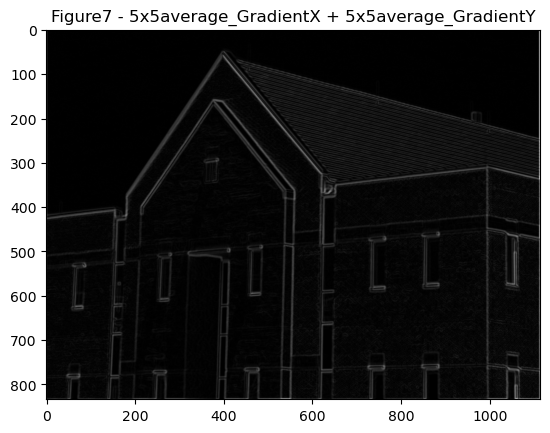

In [20]:
# x ve y yönündeki gradientlerin toplamı
G_average_5x5=gxx_average_5x5+gyy_average_5x5

# X ve Y yönündeki gradientlerin toplamı ekrana bastırıldı
plt.figure()
plt.title("Figure7 - 5x5average_GradientX + 5x5average_GradientY")
plt.imshow(G_average_5x5,cmap='gray') 

# YORUM

In [ ]:
# Yumuşatılmış orjinal görüntünün x (yukarı aşağı) ve y (sağ sol) yönündeki gradienti ekrana bastırıldı.
# Yumuşatma işlemi küçük değişimleri belirsiz, daha homojen hale getirdiğinden dolayı bir önceki kısımdaki aynı işleme göre 
# daha az değişim bölgesi ortaya çıkartıldı.
# Genellikle dış cephe gibi daha kalın değişimlerin olduğu yerler ortaya çıkmış oldu.
# duvar yüzeyindeki ince değişimler yumuşatma işleminden kaynaklı olarak etkisini kaybetti.

# 2

Dosya bilgisi :

P5 pgm formatı
width= 798
height= 958
maxval= 255


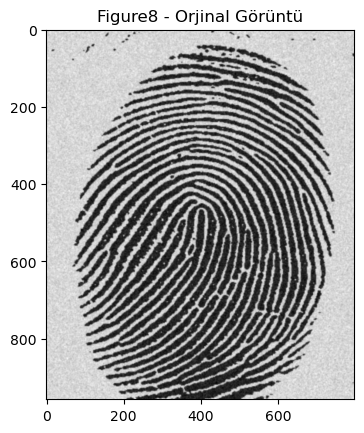

In [21]:
import matplotlib.pyplot as plt # görüntüyü bastırmak için gereklidir
import numpy as np # array işlemleri için gerekli
import math # matematiksel işlemler için gerekli

###############################FONKSİYONLAR###################################

# ilgili pikselin görüntüdeki sayısını hesaplayan fonksiyon
def histogram_funtion(height,width,f,k):
    counter=0
    for m in range(height):
        for n in range(width):
            if(f[m][n]==k):
                counter=counter+1
    return counter

# okuma işleminin yapıldığı fonksiyon
def mypgmread(pgm):
    #Fig0338(a)(blurry_moon).pgm dosyası 'rb' modunda açılarak okundu.
    with open(pgm, "rb") as fileObject:
        fileContent=fileObject.read()
        
        #dosyanın ilk iki karakterine bakılarak P5 formatı olup olmadığına bakıldı
        print('Dosya bilgisi :\n')
        i=0
        while fileContent[i]!=10:
            if i==0:
                if (fileContent[0]==80) & (fileContent[1]==53):
                    print('P5 pgm formatı')  
                else:
                    print('P5 pgm formatı değil')
            i=i+1

    
        # '#' ile başlayan satır geçildi.
        i=i+1
        while fileContent[i]!=10:
            if fileContent[i]==35:
                while fileContent[i]!=10:
                    i=i+1
    
        # genişlik yükseklik bilgileri yazdırıldı
        i=i+1
        while fileContent[i]!=10:
            if fileContent[i]==35:
                while fileContent[i]!=10:
                    i=i+1  
            else:
                string=[]
            
                while fileContent[i]!=32:
                    width=chr(fileContent[i])
                    string.append(width)       
                    i=i+1
                
                string=''.join(string)
                width=int(string)
                print("width=",width)
                i=i+1
                string=[]
            
                while fileContent[i]!=10:
                    height=chr(fileContent[i])
                    string.append(height)
                    i=i+1
                    
                string=''.join(string)
                height=int(string)
                print("height=",height)
                     
            
        # maxval değeri yazdırıldı
        i=i+1
        string=[]
        while fileContent[i]!=10:
            maxval=chr(fileContent[i])
            string.append(maxval)       
            i=i+1
    
        string=''.join(string)
        maxval=int(string)
        print("maxval=",maxval)
    

        i=i+1
        f=np.arange(height*width).reshape((height,width))      
        for m in range(height):
            for n in range(width):
                f[m][n]=fileContent[i]
                i=i+1
                
        return f,height,width,maxval
    
# Global threshold işlemi yapan fonksiyon
def global_threshold(f,height,width):
    total=0.0
    for m in range(height):
        for n in range(width):
            total+=f[m][n]

    T0=(total/(width*height))
    f2=np.arange(height*width).reshape((height,width))
    G1=np.arange(height*width).reshape((height,width))
    G2=np.arange(height*width).reshape((height,width))

    T=[]
    T.append(T0)
    i=0

    while(1):
        counter_g1=0
        counter_g2=0
        total_g1=0.0
        total_g2=0.0
    
    
        for m in range(height):
            for n in range(width):
                if f[m][n]<=T[i]:
                    G1[m][n]=f[m][n]
                    counter_g1+=1
                    total_g1+=G1[m][n]

                else:
                    G2[m][n]=f[m][n]
                    counter_g2+=1
                    total_g2+=G2[m][n]


        mean_g1=(total_g1/counter_g1)
        mean_g2=(total_g2/counter_g2)

        i+=1
        T1=0.5*(mean_g1+mean_g2)
        T.append(T1)

        if (np.abs(T[i]-T[i-1])<0.00000000000000000000000001) :
            break


        for m in range(height):
            for n in range(width):
                if f[m][n]<=T[i]:
                    f2[m][n]=0
                else:
                    f2[m][n]=255
    return f2
    


######################################################################################


# okunacak dosya  Fig1038(a)(noisy_fingerprint).pgm
pgm="Fig1038(a)(noisy_fingerprint).pgm"


# dosya içeriği, height ve width bilgileri alındı. 
f,height,width,maxval=mypgmread(pgm)  


#orjinal görüntü ekrana yazdırıldı
plt.figure()
plt.title("Figure8 - Orjinal Görüntü")
plt.imshow(f,cmap='gray') 

# YORUM

In [ ]:
# Orjinal görüntü ekrana bastırıldı.

<BarContainer object of 256 artists>

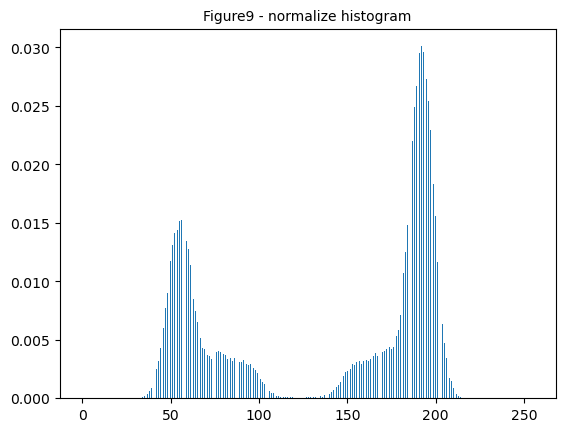

In [22]:
# histogram hesaplandı
histogram=np.arange(maxval+1)
for k in range(maxval+1):
    histogram[k]=histogram_funtion(height,width,f,k)

# histogram normalize edilerek ekrana bastırıldı.
plt.figure()
plt.title("Figure9 - normalize histogram",fontsize=10)
plt.bar(np.arange(maxval+1),histogram/(height*width),width=0.4)    

# YORUM

In [ ]:
# Orjinal görüntünün histogramı hesaplandı.
# Görüntü temel olarak iki grup  piksel değerinden oluşmakta.
# yüksek piksel değerine sahip grup arka plana ait iken, düşük piksel değerine sahip grup parmak izini temsil eder.

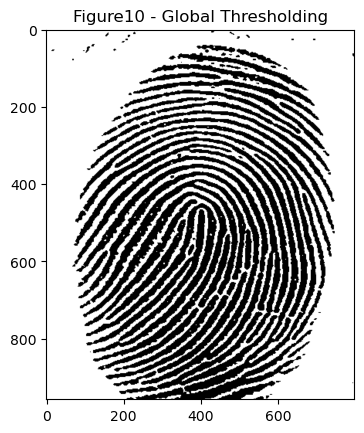

In [23]:
# global thresholding işlemi uygulandı
f=global_threshold(f,height,width)
    
# global thresholding işlemi sonucu ekrana bastırıldı
plt.figure()
plt.title("Figure10 - Global Thresholding")
plt.imshow(f,cmap='gray') 

# YORUM

In [ ]:
# orjinal görüntüye global thresholding yöntemi uygulandığında yukardaki görüntü çıkmaktadır.
# yukrdaki görüntüde parmak izi siyah, arka plan ise beyaz olarak iki piksel değerinden oluşmaktadır.
# global thresholding yönteminde öncelikle  ortalama piksel değeri hesaplanır. Bu değer başlangıç threshold değeri kabul 
# edilir. Daha sonra Bu değere göre pikseller gruplanır ve daha sonra ayrı ayrı ortalamaları bulunur. 
# Bu ortalamalarında orta noktası yeni threshold değeri olur. Bu yöntem aradaki fark çok küçük olana kadar devam eder.
# (bu örnekte fark değeri 0.00000000000000000000000001 alındı )

# 3 

Dosya bilgisi :

P5 pgm formatı
width= 772
height= 686
maxval= 255


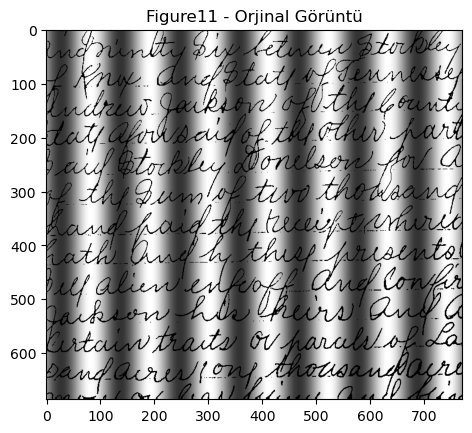

In [1]:
import matplotlib.pyplot as plt # görüntüyü bastırmak için gereklidir
import numpy as np # array işlemleri için gerekli
import math # matematiksel işlemler için gerekli

##########################################FONKSİYONLAR################################

# dosya okuma fonksiyonu
def mypgmread(pgm):
    #Fig0338(a)(blurry_moon).pgm dosyası 'rb' modunda açılarak okundu.
    with open(pgm, "rb") as fileObject:
        fileContent=fileObject.read()
        
        #dosyanın ilk iki karakterine bakılarak P5 formatı olup olmadığına bakıldı
        print('Dosya bilgisi :\n')
        i=0
        while fileContent[i]!=10:
            if i==0:
                if (fileContent[0]==80) & (fileContent[1]==53):
                    print('P5 pgm formatı')  
                else:
                    print('P5 pgm formatı değil')
            i=i+1

    
        # '#' ile başlayan satır geçildi.
        i=i+1
        while fileContent[i]!=10:
            if fileContent[i]==35:
                while fileContent[i]!=10:
                    i=i+1
    
        # genişlik yükseklik bilgileri yazdırıldı
        i=i+1
        while fileContent[i]!=10:
            if fileContent[i]==35:
                while fileContent[i]!=10:
                    i=i+1  
            else:
                string=[]
            
                while fileContent[i]!=32:
                    width=chr(fileContent[i])
                    string.append(width)       
                    i=i+1
                
                string=''.join(string)
                width=int(string)
                print("width=",width)
                i=i+1
                string=[]
            
                while fileContent[i]!=10:
                    height=chr(fileContent[i])
                    string.append(height)
                    i=i+1
                    
                string=''.join(string)
                height=int(string)
                print("height=",height)
                     
            
        # maxval değeri yazdırıldı
        i=i+1
        string=[]
        while fileContent[i]!=10:
            maxval=chr(fileContent[i])
            string.append(maxval)       
            i=i+1
    
        string=''.join(string)
        maxval=int(string)
        print("maxval=",maxval)
    

        i=i+1
        f=np.arange(height*width).reshape((height,width))      
        for m in range(height):
            for n in range(width):
                f[m][n]=fileContent[i]
                i=i+1
                
        return f,height,width,maxval
    

################################################################################


# okunacak dosya  Fig1050(a)(sine_shaded_text_image).pgm
pgm="Fig1050(a)(sine_shaded_text_image).pgm"


# dosya içeriği, height ve width bilgileri alındı. 
f,height,width,maxval=mypgmread(pgm)  


#orjinal görüntü ekrana yazdırıldı
plt.figure()
plt.title("Figure11 - Orjinal Görüntü")
plt.imshow(f,cmap='gray') 

# YORUM

In [ ]:
# Orjinal görüntü ekrana bastırıldı
# Görüntüdeki yazıların üzerinde periyodik olarak gölge izleri bulunmakta.
# Otsu's metodu ile global thresholding yapıldığında olumlu sonuç alınamamış. (LAB05 PDF'e göre )
# Bu yüzden moving average yöntemi ile local thresholding yapılacak.

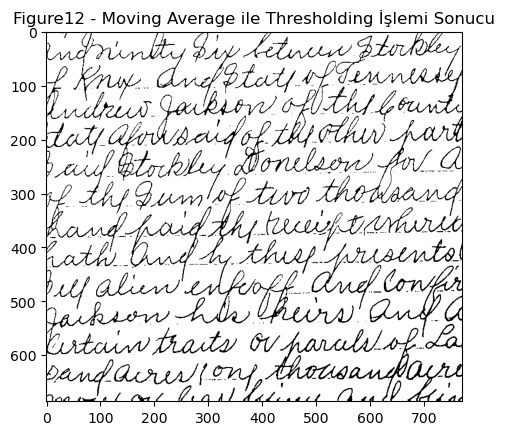

In [6]:
# moving average ile threshold işlemi
g=[]

for m in range(height):
    for n in range(width):
        total=0

        for i in range(10):
            if (n+i)<=771:
                g.append(f[m][n+i])
            else:
                g.append(0)
                
        average=(total/10.0)
        if f[m][n]<=average:
            f[m][n]=0
        else:
            f[m][n]=255
        
# moving average ile threshold işleminin sonucu ekrana bastırıldı
plt.figure()
plt.title("Figure12 - Moving Average ile Thresholding İşlemi Sonucu")
plt.imshow(f,cmap='gray') 

# YORUM

In [ ]:
# Orjinal görüntüye moving average ile local thresholding uygulayınca görüntüdeki gölgeler giderildi.
# Görüntüde bulunan gölgeler istenen yazı bölgesinin piksellerini görüntüden sıyırılmasını zorlaştırdığından dolayı moving 
# average ile yazıyı bütün görüntüden sıyırmaktansa bulunduğu küçük bölgelerden sıyırma yöntemi uygulandı.
# Burada moving average için 10 piksellik pencere seçildi. pencere genişliği 200 seçildiğinde de aynı sonuç alındı.
# görüntünün boyutunu aşan pencere elemanları 0 kabul edildi.